In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('westworld.csv')

In [37]:
df

,id,url,name,season,number,type,airdate,airtime,runtime,summary,avg_rating,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,A woman named Dolores is a free spirit in the ...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60.0,Bernard suspects that someone is sabotaging th...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60.0,Bernard continues to investigate Dolores' supp...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60.0,While Dolores joins William and Logan on their...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60.0,Dolores takes the first step on her path of di...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,09:00 PM,60.0,"While Maeve convinces Felix to show her ""upsta...",8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,09:00 PM,60.0,While William and Dolores travel to the unclai...,8.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,09:00 PM,60.0,Bernard tries to cope with what he did under R...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,09:00 PM,60.0,Bernard forces Robert to take him back into hi...,8.5,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,09:00 PM,90.0,Delores finds out the truth about William's fa...,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [38]:
df.shape

(36, 13)

# Insights to be drawn -

## Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [39]:
df1 = df.groupby('season').mean()['avg_rating'].reset_index()
df1

,season,avg_rating
0,1,8.0900
1,2,8.0000
2,3,7.7750
3,4,7.5375


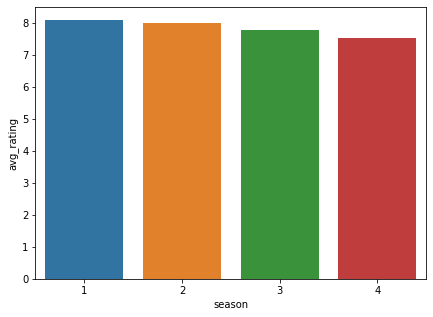

In [40]:
# barplot
plt.figure(figsize=(7,5))
sns.barplot(x=df1['season'], y=df1['avg_rating'])
plt.show()

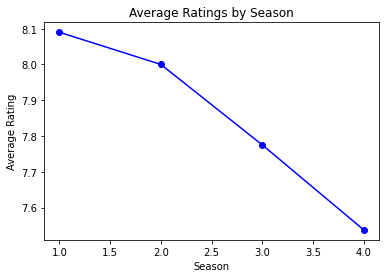

In [41]:
# Line plot
plt.plot(df1['season'], df1['avg_rating'], marker='o', linestyle='-', color='blue')
plt.title('Average Ratings by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()


## Get all the episode names, whose average rating is more than 8 for every season

In [42]:
df2 = df[df['avg_rating'] > 8][['name','avg_rating']]
df2

,name,avg_rating
6,Trompe L'Oeil,8.6
8,The Well-Tempered Clavier,8.5
9,The Bicameral Mind,8.7
17,Kiksuya,8.7
18,Vanishing Point,8.4
19,The Passenger,8.5


## Get all the episode names that aired before May 2019

In [43]:
df['airdate'] = pd.to_datetime(df['airdate'], format='%Y-%m-%d')

In [44]:
names = df[df['airdate'] < pd.Timestamp(2019, 5, 1)]['name']
names

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

## Get the episode name from each season with the highest and lowest rating

In [45]:
grouped_data = df.groupby('season')
seasons=[]
highest_rated=[]
lowest_rated=[]
episode_high=[]
episode_low=[]

for i,j in grouped_data:              # Iterate over each group
    
    # Find the episode with the highest rating in each season
    max_rating = j['avg_rating'].idxmax()
    highest_rating = j.loc[max_rating, 'avg_rating']
    episode_highest = j.loc[max_rating, 'name']
    
    # Find the episode eith the lowest rating in each season
    min_rating = j['avg_rating'].idxmin()
    lowest_rating = j.loc[min_rating, 'avg_rating']
    episode_lowest = j.loc[min_rating,'name']
    
    seasons.append(i)
    highest_rated.append(highest_rating)
    episode_high.append(episode_highest)
    lowest_rated.append(lowest_rating)
    episode_low.append(episode_lowest)
    
final_df = pd.DataFrame({
    'season' : seasons,
    'highest_rating' : highest_rated,
    'episode with highest rating' : episode_high,
    'lowest_rating' : lowest_rated,
    'episode with lowest rating' : episode_low
})

In [46]:
final_df

,season,highest_rating,episode with highest rating,lowest_rating,episode with lowest rating
0,1,8.7,The Bicameral Mind,7.6,The Stray
1,2,8.7,Kiksuya,7.6,Akane No Mai
2,3,8.0,Parce Domine,7.5,Decoherence
3,4,7.8,Zhuangzi,7.1,The Auguries


## Get the summary for the most popular ( ratings ) episode in every season

In [47]:
grouped_data = df.groupby('season')
max_ratings_index = grouped_data['avg_rating'].idxmax()
highest_rated_episode = df.loc[max_ratings_index, ['season','name','avg_rating','summary']]

In [48]:
highest_rated_episode

,season,name,avg_rating,summary
9,1,The Bicameral Mind,8.7,Delores finds out the truth about William's fa...
17,2,Kiksuya,8.7,Another of Westworld's Host revolutionaries is...
20,3,Parce Domine,8.0,"If you're stuck in a loop, try walking in a st..."
32,4,Zhuangzi,7.8,God is bored.
